In [1]:
import glacierml as gl
import pandas as pd
import numpy as np
from tqdm import tqdm
import tensorflow as tf
import glob
import os
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)


2023-08-31 11:33:17.370005: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-31 11:33:17.417327: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-31 11:33:18.125171: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [18]:
df_glob

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,Zmax,Zmed,Slope,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,region,1,loss,2,3,layer architecture,parameterization
0,RGI60-01.00001,G213177E63689N,20090703,-9999999,-146.8230,63.6890,1,2,0.360,1936,2725,2385,42.0,346,839,0,0,0,0,9,9,NaN,01,54.018845,mae,27.144028,20.923140,9-8,4
1,RGI60-01.00002,G213332E63404N,20090703,-9999999,-146.6680,63.4040,1,2,0.558,1713,2144,2005,16.0,162,1197,0,0,0,0,9,9,NaN,01,81.694756,mae,43.752262,58.391788,9-8,4
2,RGI60-01.00003,G213920E63376N,20090703,-9999999,-146.0800,63.3760,1,2,1.685,1609,2182,1868,18.0,175,2106,0,0,0,0,9,9,NaN,01,81.210670,mae,43.956978,57.201500,9-8,4
3,RGI60-01.00004,G213880E63381N,20090703,-9999999,-146.1200,63.3810,1,2,3.681,1273,2317,1944,19.0,195,4175,0,0,0,0,9,9,NaN,01,88.889771,mae,51.586826,63.547817,9-8,4
4,RGI60-01.00005,G212943E63551N,20090703,-9999999,-147.0570,63.5510,1,2,2.573,1494,2317,1914,16.0,181,2981,0,0,0,0,9,9,NaN,01,90.279999,mae,50.498779,65.083160,9-8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216496,RGI60-19.02748,G322268E53986S,20020502,-9999999,-37.7325,-53.9860,19,3,0.042,310,510,-999,29.9,315,255,0,0,0,0,9,9,NaN,19,26.009912,mae,21.301302,29.679562,9-8,4
216497,RGI60-19.02749,G323864E54831S,20030207,-9999999,-36.1361,-54.8310,19,3,0.567,330,830,-999,23.6,200,1130,0,0,0,0,9,9,NaN,19,41.548794,mae,20.514593,44.716702,9-8,4
216498,RGI60-19.02750,G322698E54188S,20030207,-9999999,-37.3018,-54.1884,19,3,4.118,10,1110,-999,16.8,308,4329,0,0,0,1,9,9,NaN,19,76.352234,mae,45.117935,69.111229,9-8,4
216499,RGI60-19.02751,G269573E68866S,19870101,-9999999,-90.4266,-68.8656,19,1,0.011,170,270,-999,0.4,122,106,0,0,0,1,9,9,AQ6C10200013,19,119.417435,mae,47.900131,95.244598,9-8,4


In [20]:
# parameterization = '4'
# data = gl.parameterize_data(parameterization)
# model_statistics = pd.read_pickle('zults/model_statistics_' + parameterization + '.pkl')

architecture_weights, residual_model = gl.compute_model_weights(
    '4',pth = '/data/fast1/glacierml/data'
)

# architecture_weights
aw = architecture_weights

                RGIId     CenLat      CenLon  Slope  Zmin  Zmed  Zmax   
0      RGI60-01.00037  63.469173 -146.528168   12.0   722  1841  3081  \
1      RGI60-01.00037  63.469173 -146.528168   12.0   722  1841  3081   
2      RGI60-01.00037  63.469173 -146.528168   12.0   722  1841  3081   
3      RGI60-01.00037  63.469173 -146.528168   12.0   722  1841  3081   
4      RGI60-01.00037  63.469173 -146.528168   12.0   722  1841  3081   
...               ...        ...         ...    ...   ...   ...   ...   
14999  RGI60-19.02059 -62.670700  -60.354700    6.7    10  -999   370   
15000  RGI60-19.02059 -62.670700  -60.354700    6.7    10  -999   370   
15001  RGI60-19.02059 -62.670700  -60.354700    6.7    10  -999   370   
15002  RGI60-19.02059 -62.670700  -60.354700    6.7    10  -999   370   
15003  RGI60-19.02059 -62.670700  -60.354700    6.7    10  -999   370   

          Area  Aspect   Lmax  Thickness layer architecture      1      2   
0      234.583      30  41911      235.0      

100%|██████████| 22/22 [00:00<00:00, 37.03it/s]

calculating residual curve...
[ 7.96269030e-04 -5.70379530e-01  2.52716759e+01]


In [10]:
aw = aw.sort_values('aw_1')
aw = aw.reset_index()
aw = aw.drop('index',axis = 1)

In [21]:
aw

,aw_1,layer architecture,loss,simple var,std_1,IQR_1,bias_1,std_2,IQR_2,bias_2,std_3,IQR_3,bias_3,IQR_4,aw_2,aw_3,aw_4,var_1,var_2,var_3
0,434.097135,10-4,mae,1861.011108,20.711840,0.525,5.116834,22.092629,0.56,8.099589,22.092629,0.56,8.393963,18.162140,496.183844,496.478218,1861.011108,428.980301,488.084254,488.084254
1,473.862737,10-4,mse,1827.620117,21.689559,0.590,3.425762,20.586700,0.56,8.179795,20.586700,0.56,7.821795,16.308860,431.992019,431.634019,1827.620117,470.436975,423.812224,423.812224
2,449.858221,10-7,mae,1853.567261,21.012951,0.510,8.314131,23.073044,0.56,10.592375,23.073044,0.56,8.766466,17.420828,542.957721,541.131812,1853.567261,441.544089,532.365346,532.365346
3,581.168677,10-7,mse,2015.683594,23.918501,0.600,9.073968,22.323935,0.56,13.701828,22.323935,0.56,8.481847,19.644763,512.059885,506.839904,2015.683594,572.094708,498.358057,498.358057
4,470.735000,11-10,mae,1440.291870,21.476970,0.520,9.474744,23.129045,0.56,10.192326,23.129045,0.56,8.787744,17.050172,545.145050,543.740467,1440.291870,461.260256,534.952723,534.952723
5,607.254331,11-10,mse,1763.957520,24.428218,0.605,10.516493,22.611243,0.56,13.630401,22.611243,0.56,8.591008,15.567548,524.898719,519.859326,1763.957520,596.737838,511.268318,511.268318
6,703.698233,11-6,mae,1476.842773,26.281077,0.640,13.003227,22.995942,0.56,18.121065,22.995942,0.56,8.737172,17.420828,546.934430,537.550536,1476.842773,690.695006,528.813364,528.813364
7,474.726099,11-6,mse,1463.261353,21.630711,0.565,6.838437,21.439289,0.56,8.876686,21.439289,0.56,8.145731,14.826237,468.519793,467.788838,1463.261353,467.887662,459.643107,459.643107
8,395.745021,11-8,mae,1569.814331,19.637344,0.470,10.119759,23.397686,0.56,11.004692,23.397686,0.56,8.889812,15.938204,558.456399,556.341519,1569.814331,385.625262,547.451707,547.451707
9,456.320294,11-8,mse,1599.387207,21.216496,0.555,6.180591,21.407636,0.56,9.529228,21.407636,0.56,8.133704,14.826237,467.816090,466.420567,1599.387207,450.139703,458.286862,458.286862


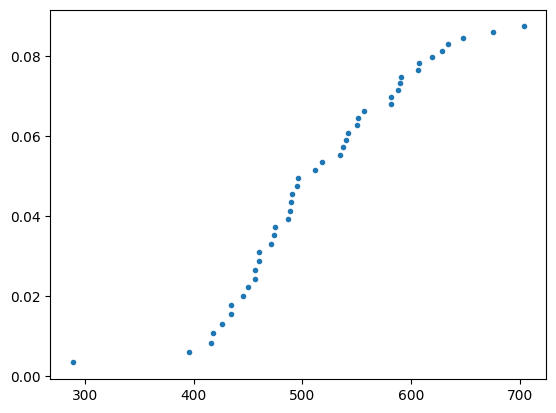

In [14]:
plt.scatter(
    aw.aw_1,
    np.cumsum(1/aw.aw_1),marker = '.'
)

In [ ]:
aw['IQR_1'] / 1.34896

In [ ]:
plt.scatter(
    aw.index,
    aw.aw_1,
    label = 'Interpretation 1'
)
plt.scatter(
    aw.index,
    aw.aw_2,
    label = 'Interpretation 2'
)
plt.scatter(
    aw.index,
    aw.aw_3,
    label = 'Interpretation 3'
)
plt.ylabel('Architecture Weight')
plt.xlabel('Architecture Index')
plt.legend()


In [ ]:

# plt.plot(
#     aw.index, 
#     1 / (np.cumsum(1/ architecture_weights['architecture weight']))
# )
# plt.title('Cumulative Thickness Variance' +  
#           r' $\hat{\sigma}_{l}^{2} =\frac{{1}}{{\sum_{i}1 / \sigma^{2}_{il}}}$'
#          )
# plt.xlabel('Architecture Index (i)')
# plt.ylabel('Composite Variance $(\hat{\sigma}_{l}^{2})$')
# plt.grid(visible = None)

# Model Weighting

In [22]:
parameterization = '4'
est = pd.read_pickle('model_weights/xval_param' + parameterization + '_weighting_data.pkl')

In [23]:
est

,RGIId,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Thickness,layer architecture,1,2,3,loss,pr_1,pr_2,pr_3,r_1,r_2,r_3
0,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0,10-4,169.309738,219.540634,221.896973,mae,-0.280851,-0.063830,-0.055319,-66.0,-15.0,-13.0
1,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0,10-4,127.195259,207.492889,185.056061,mse,-0.459574,-0.119149,-0.212766,-108.0,-28.0,-50.0
2,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0,10-7,249.325058,223.600845,209.215530,mae,0.059574,-0.046809,-0.110638,14.0,-11.0,-26.0
3,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0,10-7,132.984741,223.192093,250.199951,mse,-0.434043,-0.051064,0.063830,-102.0,-12.0,15.0
4,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0,11-10,280.356140,218.767303,249.816803,mae,0.191489,-0.068085,0.063830,45.0,-16.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14999,RGI60-19.02059,-62.670700,-60.354700,6.7,10,-999,370,5.493,273,3056,97.0,8-7,81.057999,44.342091,90.226967,mse,-0.164948,-0.546392,-0.072165,-16.0,-53.0,-7.0
15000,RGI60-19.02059,-62.670700,-60.354700,6.7,10,-999,370,5.493,273,3056,97.0,9-4,80.654053,46.613327,88.291580,mae,-0.164948,-0.515464,-0.092784,-16.0,-50.0,-9.0
15001,RGI60-19.02059,-62.670700,-60.354700,6.7,10,-999,370,5.493,273,3056,97.0,9-4,92.029755,55.197132,55.836975,mse,-0.051546,-0.432990,-0.422680,-5.0,-42.0,-41.0
15002,RGI60-19.02059,-62.670700,-60.354700,6.7,10,-999,370,5.493,273,3056,97.0,9-8,105.737732,46.781616,88.213394,mae,0.092784,-0.515464,-0.092784,9.0,-50.0,-9.0


In [ ]:
# est

In [26]:
# model_list = [
#      '0', '1', '2', '3', '4', '5', '6', '7', '8',
#      '9', '10', '11', '12', '13', '14', '15', '16',
#      '17', '18', '19', '20', '21', '22', '23', '24',
# ]
# pool_list = [
#      'pr_0', 'pr_1', 'pr_2', 'pr_3', 'pr_4', 'pr_5', 'pr_6', 'pr_7', 'pr_8',
#      'pr_9', 'pr_10', 'pr_11', 'pr_12', 'pr_13', 'pr_14', 'pr_15', 'pr_16',
#      'pr_17', 'pr_18', 'pr_19', 'pr_20', 'pr_21', 'pr_22', 'pr_23', 'pr_24',
# ]
# res_list = [
#      'r_0', 'r_1', 'r_2', 'r_3', 'r_4', 'r_5', 'r_6', 'r_7', 'r_8',
#      'r_9', 'r_10', 'r_11', 'r_12', 'r_13', 'r_14', 'r_15', 'r_16',
#      'r_17', 'r_18', 'r_19', 'r_20', 'r_21', 'r_22', 'r_23', 'r_24',
# ]
# weight_list = [
#      'w_0', 'w_1', 'w_2', 'w_3', 'w_4', 'w_5', 'w_6', 'w_7', 'w_8',
#      'w_9', 'w_10', 'w_11', 'w_12', 'w_13', 'w_14', 'w_15', 'w_16',
#      'w_17', 'w_18', 'w_19', 'w_20', 'w_21', 'w_22', 'w_23', 'w_24',
# ]

model_list = [
     '1', '2', '3'
]
pool_list = [
     'pr_1', 'pr_2', 'pr_3'
]
res_list = [
     'r_1', 'r_2', 'r_3'
]
weight_list = [
     'w_1', 'w_2', 'w_3'
]

In [ ]:
est[model_list] = np.round(est[model_list], 0)
est[pool_list] = np.round(est[pool_list], 2)

In [ ]:
# est

In [ ]:

# df = pd.DataFrame()
# for i in tqdm(range(0,54901,161)):
# #     print(i)
# #     print(i + 161)
# #     print('')
    
#     dfg = est[model_list].iloc[i:i+161]
#     y = pd.DataFrame(dfg.var(axis = 0)).astype(float)
#     x = est[[
#          'CenLat',
#          'CenLon',
#          'Slope',
#          'Zmin',
#          'Zmed',
#          'Zmax',
#          'Area',
#          'Aspect',
#          'Lmax',
#          'Thickness',
#     ]].iloc[i:i+25]
    
#     dft = pd.concat([x.reset_index(drop=True),y.reset_index(drop=True)],axis=1)
#     df = pd.concat([df, dft])
# #     break
# for i in list(x):
#     fig, ax = plt.subplots(1,1,figsize = (10,10))
#     plt.scatter(
#         df[i],
#         df[0]
#     )
#     plt.title(i)

In [ ]:
f = np.random.normal(1, 2, 7500)
# f = np.random.normal(1, 2, 216501)

plt.hist((f), 25)
# plt.yscale('log')
plt.plot(
    [np.percentile(f,50),np.percentile(f,50)],
    [0,950], 'k--'
)
plt.plot(
    [np.percentile(f,25),np.percentile(f,25)],
    [0,900], 'k--'
)
plt.plot(
    [np.percentile(f,75),np.percentile(f,75)],
    [0,900], 'k--'
)
plt.text(
    
    
    (f).mean() - 0.5,
    955, s = 'Median'
)
plt.text(
    np.percentile(f,75) + .18 ,
    900, s = 'Q3'
)
plt.text(
    np.percentile(f, 25) - 0.76,
    900, s = 'Q1'
)


np.percentile(f,75) - np.percentile(f, 25)
plt.ylim([0,1150])
# plt.xscale('log')

In [ ]:

# f = est[pool_list].to_numpy().flatten()
# plt.hist((f), 25)
# plt.yscale('log')
# plt.plot(
#     [f.mean(),f.mean()],
#     [0,1e7], 'k--'
# )
# plt.plot(
#     [np.percentile(f,25),np.percentile(f,25)],
#     [0,1e7], 'k--'
# )
# plt.plot(
#     [np.percentile(f,75),np.percentile(f,75)],
#     [0,1e7], 'k--'
# )
# # plt.text(
    
    
#     (f).mean() - 0.5,
#     1e7, s = 'Median'
# )
# plt.text(
#     np.percentile(f,75) + .18 ,
#     4000000, s = 'Q3'
# )
# plt.text(
#     np.percentile(f, 25) - 0.76,
#     4000000, s = 'Q1'
# )

# plt.ylim([0,1150])
# plt.xscale('log')

In [ ]:
# f = est[pool_list][est[pool_list].values <2]

In [ ]:
# f

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# fake data
x = f

# setup the figure and axes
fig = plt.figure(figsize = (12,12))
bpAx = fig.add_axes([0.2, 0.7, 0.7, 0.2])   # left, bottom, width, height:
                                            # (adjust as necessary)
histAx = fig.add_axes([0.2, 0.2, 0.7, 0.5]) # left specs should match and
                                            # bottom + height on this line should
                                            # equal bottom on bpAx line
# plot stuff
bp = bpAx.boxplot(x, notch=True, vert=False)
h = histAx.hist(x, bins=25)

# confirm that the axes line up 
xlims = np.array([bpAx.get_xlim(), histAx.get_xlim()])
# for ax in [bpAx, histAx]:
#     ax.set_xlim([xlims.min(), xlims.max()])

bpAx.set_xticklabels([])  # clear out overlapping xlabels
bpAx.set_yticks([])  # don't need that 1 tick mark
# plt.yscale('log')
plt.plot(
    [np.percentile(f, 50),np.percentile(f,50)],
    [0,950], 'k--'
)
plt.text(np.percentile(f,50) - .65 , 953, 'Median')
plt.plot(
    [np.percentile(f,25),np.percentile(f,25)],
    [0,900], 'k--'
)
plt.text(np.percentile(f,25) , 895, 'Q1')

plt.plot(
    [np.percentile(f,75),np.percentile(f,75)],
    [0,900], 'k--'
)
plt.text(np.percentile(f,75)  , 895, 'Q2')

# plt.yscale('log')
plt.show()

np.percentile(f,75) - np.percentile(f,25)

In [ ]:
# plt.boxplot(est[pool_list].to_numpy().flatten())

# By Architecture

In [24]:
est

,RGIId,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Thickness,layer architecture,1,2,3,loss,pr_1,pr_2,pr_3,r_1,r_2,r_3
0,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0,10-4,169.309738,219.540634,221.896973,mae,-0.280851,-0.063830,-0.055319,-66.0,-15.0,-13.0
1,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0,10-4,127.195259,207.492889,185.056061,mse,-0.459574,-0.119149,-0.212766,-108.0,-28.0,-50.0
2,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0,10-7,249.325058,223.600845,209.215530,mae,0.059574,-0.046809,-0.110638,14.0,-11.0,-26.0
3,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0,10-7,132.984741,223.192093,250.199951,mse,-0.434043,-0.051064,0.063830,-102.0,-12.0,15.0
4,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0,11-10,280.356140,218.767303,249.816803,mae,0.191489,-0.068085,0.063830,45.0,-16.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14999,RGI60-19.02059,-62.670700,-60.354700,6.7,10,-999,370,5.493,273,3056,97.0,8-7,81.057999,44.342091,90.226967,mse,-0.164948,-0.546392,-0.072165,-16.0,-53.0,-7.0
15000,RGI60-19.02059,-62.670700,-60.354700,6.7,10,-999,370,5.493,273,3056,97.0,9-4,80.654053,46.613327,88.291580,mae,-0.164948,-0.515464,-0.092784,-16.0,-50.0,-9.0
15001,RGI60-19.02059,-62.670700,-60.354700,6.7,10,-999,370,5.493,273,3056,97.0,9-4,92.029755,55.197132,55.836975,mse,-0.051546,-0.432990,-0.422680,-5.0,-42.0,-41.0
15002,RGI60-19.02059,-62.670700,-60.354700,6.7,10,-999,370,5.493,273,3056,97.0,9-8,105.737732,46.781616,88.213394,mae,0.092784,-0.515464,-0.092784,9.0,-50.0,-9.0


In [27]:
weights = pd.DataFrame()
architecture_weights = pd.DataFrame()
for loss in ['mae','mse']:
    for i in tqdm(arch_list):
        dft = est[
            (est['layer architecture'] == str(i)) &
            (est['loss'] == loss)
        ]


        # simple method
        simple_var = np.var(dft[res_list].to_numpy().flatten())
        q75, q25 = np.nanpercentile(dft[res_list], [75,25])
        sigma_simple = ((q75 - q25) ) / 1.5 


        # interpretation 1: pooling just the model stuff
        bias_1 = np.mean(dft[pool_list].to_numpy()) * np.mean(dft[model_list].to_numpy())

        q75, q25 = np.nanpercentile(dft[pool_list], [75,25])
        sigma_1 = ((q75 - q25) * np.mean(dft[model_list].to_numpy())) / 1.5 


        # interpretation 2: pool model, but take the mean creatively
        bias_2 = np.mean(dft[pool_list].to_numpy() * dft[model_list].to_numpy())




        # interpretation 3: Take the mean of the pool and scale by model thickness
        bias_3 = np.mean(est[pool_list].to_numpy()) * np.mean(dft[model_list].to_numpy())
        q75, q25 = np.nanpercentile(est[pool_list], [75,25])
        sigma_3 = ((q75 - q25) * np.mean(dft[model_list].to_numpy())) / 1.5 

        var = dft[model_list].values.var()
#         w = pd.Series(
#             abs(bias_1) + sigma_1**2, 
#             name = 'weight'
#         )

#         w = pd.Series(
#             simple_var, 
#             name = 'weight'
#         )

        w = pd.Series(
            abs(bias_1) + sigma_1**2, 
            name = 'weight'
        )
    #     print(var)
    #     break
        architecture_weights = pd.concat([architecture_weights, w])
        architecture_weights = architecture_weights.reset_index()
        architecture_weights = architecture_weights.drop('index', axis = 1)
        
        architecture_weights.loc[architecture_weights.index[-1], 'layer architecture'] = i
        architecture_weights.loc[architecture_weights.index[-1], 'loss'] = loss
        architecture_weights.loc[architecture_weights.index[-1], 'bias1'] = bias_1
        architecture_weights.loc[architecture_weights.index[-1], 'bias2'] = bias_2
        architecture_weights.loc[architecture_weights.index[-1], 'bias3'] = bias_3
        architecture_weights.loc[architecture_weights.index[-1], 'var_1'] = sigma_1**2
    #     architecture_weights.loc[architecture_weights.index[-1], 'std'] = sigma
        architecture_weights.loc[architecture_weights.index[-1], 'var_2'] = sigma_3**2
        architecture_weights.loc[architecture_weights.index[-1], 'simple var'] = simple_var
        architecture_weights.loc[architecture_weights.index[-1], 'simple sig'] = sigma_simple

    
#     break
architecture_weights = architecture_weights.rename(columns = {0:'architecture weight'})
aw = architecture_weights
aw

100%|██████████| 22/22 [00:00<00:00, 96.14it/s]


,architecture weight,layer architecture,loss,bias1,bias2,bias3,var_1,var_2,simple var,simple sig
0,351.641394,10-4,mae,5.114770,8.095141,8.393245,346.526624,395.351408,1332.831396,16.333333
1,365.813515,10-7,mae,8.315109,10.581291,8.764136,357.498405,431.063886,1227.650475,15.000000
2,393.268151,11-10,mae,9.468006,10.204572,8.784229,383.800145,433.042692,964.264402,16.000000
3,569.185058,11-6,mae,13.003903,18.114756,8.736416,556.181155,428.341438,1290.440481,19.333333
4,327.888180,11-8,mae,10.124798,10.990947,8.891439,317.763382,443.677658,1009.472991,14.666667
5,399.118975,12-4,mae,8.813658,10.534207,8.775759,390.305318,432.208054,1150.578960,16.000000
6,514.914132,12-5,mae,11.447987,17.146583,8.423443,503.466145,398.201394,1214.764499,19.333333
7,452.883009,14-12,mae,12.523142,15.308706,9.192643,440.359867,474.246589,1273.285279,16.000000
8,396.768982,14-5,mae,8.559123,10.500395,8.640455,388.209860,418.983232,1271.397752,16.000000
9,341.082499,16-7,mae,10.598330,12.671205,8.939354,330.484169,448.472427,1221.477813,14.666667


In [ ]:
aw = aw.sort_values('architecture weight')

In [ ]:
plt.scatter(aw['layer architecture'],aw['aw_1'])

In [ ]:
# data

In [ ]:
# ticks

In [ ]:
# data['layer architecture'].iloc[ticks]

IndexError: single positional indexer is out-of-bounds

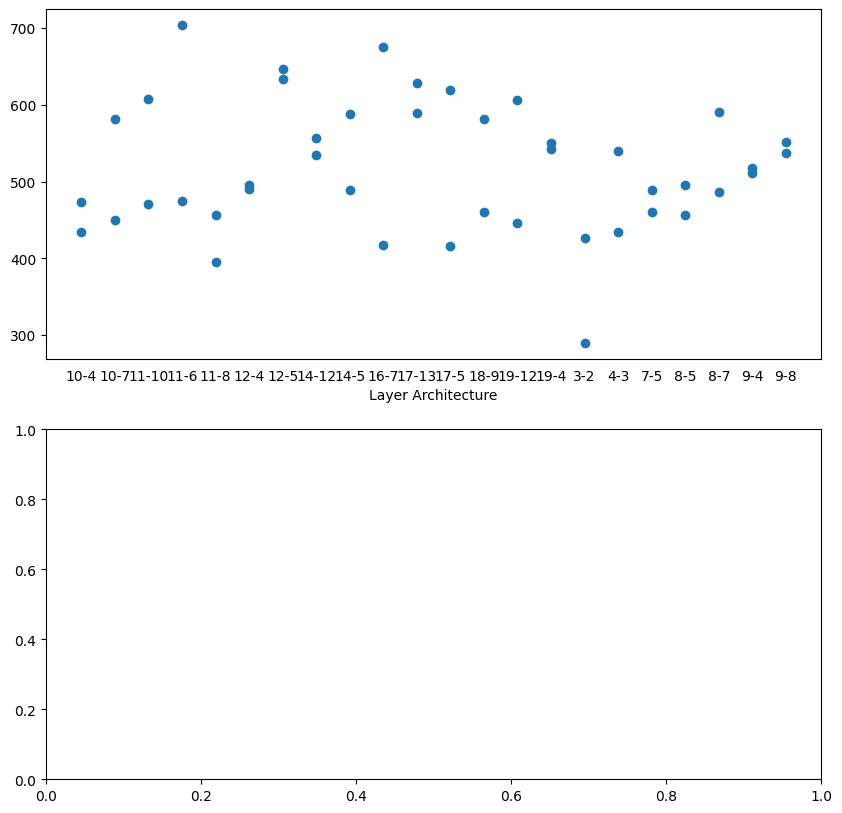

In [18]:

fig, ax = plt.subplots(2,1, figsize = (10,10))

plt.subplot(2,1,1)

plt.scatter(
    architecture_weights['layer architecture'],
    architecture_weights['aw_1']
)

plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=True)
plt.grid(False)
plt.xlabel('Layer Architecture')
plt.xticks([architecture_weights['layer architecture'].iloc[0], 
            architecture_weights['layer architecture'].iloc[85],
            architecture_weights['layer architecture'].iloc[160]])
plt.ylabel('Architecture Weight')



plt.subplot(2,1,2)

sum_of_weights = sum(1/architecture_weights['aw_1'])

plt.plot(
    np.sort(1/architecture_weights['aw_1'][::-1] )/ sum_of_weights, 'o'
#     marker = '.',
#     linestyle = None
    
)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.ylabel('Fractional Weight')
# string = '$w_{i} = \frac{1}{N_{g}N_{x}} \sum_{j}^{N_g} \sum_{k}^{N_x} \left(R_{ijk} - M_{i}\right)^2$'
plt.suptitle('Simple Residual Variance Weights $ w_i = {}^{R}_{}\sigma^{2}_{i}$', y = 0.92)

In [ ]:
# import pandas as pd

# rootdir = 'zults/'
# predictions = pd.DataFrame()
# statistics = pd.DataFrame()
# file_reader = pd.read_pickle(rootdir + 'model_statistics_' + '4' + '.pkl')
# statistics = pd.concat([statistics, file_reader], ignore_index = True)

# # statistics = statistics.drop('Unnamed: 0', axis = 1)
# statistics['total parameters'] = statistics['total parameters'].astype(int)
# statistics['trained parameters'] = statistics['trained parameters'].astype(int)
# statistics['total inputs'] = statistics['total inputs'].astype(int)
# statistics['test - train'] = (
#     abs(statistics['test mae avg'] - statistics['train mae avg']))
# statistics['paramater ratio'] = statistics['trained parameters'] / statistics['total inputs']
# statistics

In [30]:
parameterization = '4'
rootdir = 'temp/'
stats1 = pd.DataFrame()
stats2 = pd.DataFrame()
losses = ['mae','mse']

for k in range(1,4,1):
    k = str(k)
    for loss in losses:
        stats = pd.read_pickle(
            rootdir + 'model_statistics_xval_' + k + '_' + 
            loss + '_' + parameterization + '.pkl'
        )
        stats['fold'] = k
        if loss == 'mae':
            stats1 = pd.concat([stats1,stats])
        if loss == 'mse':
            stats2 = pd.concat([stats2,stats])
stats1['parameter ratio'] = stats1['parameters'] / stats1['inputs']
stats2['parameter ratio'] = stats2['parameters'] / stats2['inputs']
stats = pd.merge(
    stats1,stats2,how = 'inner',
    on = ['layer architecture','parameter ratio','parameters','fold']
)

stats = stats.sort_values('parameter ratio')


k1 = stats[stats['fold'] == '1']
k2 = stats[stats['fold'] == '2']
k3 = stats[stats['fold'] == '3']
k_list = [k1,k2,k3]
n_list = ['1','2','3']

arch_list = pd.DataFrame()

for n, k in zip(n_list, k_list):



    x1 = k['parameter ratio']
    y1 = k['loss avg_x']
    model1 = np.poly1d(np.polyfit(x1, y1, 2))

    x2 = k['parameter ratio']
    y2 = np.sqrt(k['loss avg_y'])
    model2 = np.poly1d(np.polyfit(x2, y2, 2))
    
    sts = k[
        (k['loss avg_x'] <= model1(x1)) &
#         (k['loss avg_x'] <= model2(x2)) &
        (np.sqrt(k['loss avg_y']) <= model2(x2)) 
#         (np.sqrt(k['loss avg_y']) <= model1(x1))
    ]
    std = k.drop(sts.index)
    
    if n == '1':
        arch_list_1 = sts
    if n == '2':
        arch_list_2 = sts     
    if n == '3':
        arch_list_3 = sts
# print(arch_list_1['layer architecture'])

arch_list = pd.merge(
    arch_list_1[['layer architecture','parameters','parameter ratio']], 
    arch_list_2[['layer architecture','parameters','parameter ratio']],
    how = 'inner', on = ['layer architecture','parameters','parameter ratio']
)
# print(arch_list)
arch_list = pd.merge(
    arch_list[['layer architecture','parameters','parameter ratio']], 
    arch_list_2[['layer architecture','parameters','parameter ratio']],
    how = 'inner', on = ['layer architecture','parameters','parameter ratio']
)
arch_list = arch_list.sort_values('layer architecture')

# arch_list = arch_list.values.flatten()

In [31]:
arch_list

,layer architecture,parameters,parameter ratio


In [24]:
data = pd.merge(arch_list, aw, how = 'inner', on = 'layer architecture')
data = data.sort_values('parameters')

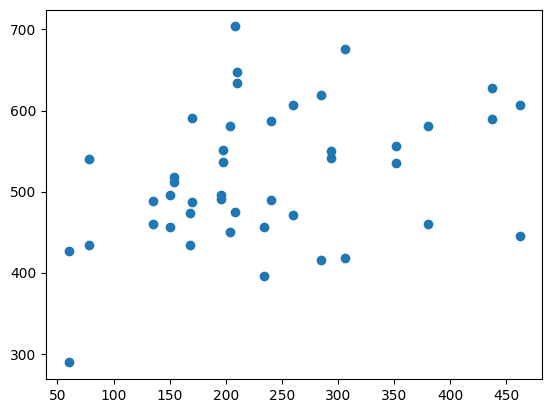

In [26]:
plt.scatter(
    data.parameters,
    data.aw_1
)

In [ ]:
ticks = []
for i in range(0,161,20):
    print(i)
    ticks.append(i)

In [ ]:
data = data.sort_values('trained parameters')
fig, ax = plt.subplots()
ax.grid(False)
ax.scatter(
    data['trained parameters'],
    (data['aw_1'])
)
# ax.set_xticks( ticks, rotation = 45, 
#                     labels = data['layer architecture'].iloc[ticks]
# )
# plt.grid(False)
# plt.xlabel('layer architecture')
# plt.ylabel('architecture weight')
# ax_upper = ax.twiny() 
# ax.set_xticks( ticks, rotation = 45, 
#                     labels = data['trained parameters'].iloc[ticks]
# )
# # ax.grid(False)
# ax_upper.grid(False)
ax.set_xlabel('Model Parameters')
# ax.set_xlabel('Model Layer Architecture')
ax.set_ylabel('Architecture Weight')
fig.subplots_adjust(top=0.85)


In [ ]:
import matplotlib.pyplot as plt

# fig, ax = plt.subplots()
fig, ax = plt.subplots(2,1, figsize = (10,10))
plt.subplot(2,1,1)

# ax1 = fig.add_subplot(111)
ax[0].scatter(
    data['layer architecture'],
    (data['aw_1']),
#     c = data['trained parameters']
)



ax[0].set_xticks(ticks, rotation = 45, labels = data['layer architecture'].iloc[ticks])

# ax.grid(True)
# ax.set_xlabel('Layer Architecture')
ax2 = ax[0].twiny()
ax2.set_xticks( ax[0].get_xticks() )
ax2.set_xbound(ax[0].get_xbound())
ax2.set_xticks(ax[0].get_xticks(), rotation = 45, 
                    labels = data['trained parameters'].iloc[ticks]
)
# ax2.grid(True)
ax2.set_xlabel('Trained Model Parameters')
ax[0].set_ylabel('Architecture Weight')
# ax[0].tick_params(
#     axis='x',          
#     which='both',      
#     bottom=False,      
#     top=False,         
#     labelbottom=False)

plt.subplot(2,1,2)


sum_of_weights = sum(1/aw['aw_1'])

plt.plot(
    np.sort(1/aw['aw_1'][::-1] )/ sum_of_weights, 'o',
#     c = data['trained parameters']
#     marker = '.',
#     linestyle = None
    
)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.ylabel('Fractional Weight')


fig.subplots_adjust(top=0.85)
fig.suptitle('Architecture Weights as a Function of Model Complexity',y = 0.95)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(
    data['layer architecture'],
    data['trained parameters'],
#     c = data['aw_1']
)
ticks = []
for i in range(0,161,20):
    print(i)
    ticks.append(i)
plt.xticks(ticks, rotation = 45, labels = data['layer architecture'].iloc[ticks])
plt.xlabel('Model Layer Architecture')
plt.ylabel('Trained Model Parameters')
# plt.colorbar(label = 'Model Weight')

In [ ]:
fig, ax1 = plt.subplots()

# ax1 = fig.add_subplot(111)

ax1.plot(
    (0,5),(0,5)
)
ax1.set_xlim(0,5)
ax1.set_ylim(0,5)
# ax1.grid(True)

ax2 = ax1.twiny()
ax2.set_xticks( ax1.get_xticks() )
# ax2.set_xbound(ax1.get_xbound())
# ax2.set_xticklabels([x * 2 for x in ax1.get_xticks()])

title = ax1.set_title("Upper x-axis ticks are lower x-axis ticks doubled!")
# title.set_y(1.1)
# fig.subplots_adjust(top=0.85)

In [ ]:
data

In [ ]:
data

In [ ]:
# data[(data['architecture weight'] == data['architecture weight'].min())]

In [ ]:
plt.scatter(
    aw.index,
    (aw['simple sig'])**2
)

In [ ]:
for i in range(1,4,1):
    plt.scatter(
        aw.index,
        aw['bias'+str(i)], 
        label = 'Interpretation '+str(i)
    )
plt.ylabel('Model Bias')
plt.xlabel('Architecture Index')
plt.legend()

In [ ]:
plt.scatter(
    aw.index,
    aw['var_1'],
    label = 'Model Pool Deviation IQR'
)
plt.scatter(
    aw.index,
    aw['var_2'],
    label = 'Total Pool Deviation IQR'
)
plt.legend()
plt.show()

In [ ]:
plt.scatter(
    aw.index,
    aw['var_1'] + aw['bias1'],
    alpha = 0.5,
    label = 'Weight 1'
)
plt.scatter(
    aw.index,
    aw['var_1'] + aw['bias2'],
    alpha = 0.5,
    label = 'Weight 2'
)
plt.scatter(
    aw.index,
    aw['var_1'] + aw['bias3'],
    alpha = 0.5,
    label = 'Weight 3'
)
plt.scatter(
    aw.index,
    aw['var_2'] + aw['bias1'],
    alpha = 0.5,
    label = 'Weight 4'
)
plt.scatter(
    aw.index,
    aw['var_2'] + aw['bias2'],
    alpha = 0.5,
    label = 'Weight 5'
)
plt.scatter(
    aw.index,
    aw['var_2'] + aw['bias3'],
    alpha = 0.5,
    label = 'Weight 6'
)
plt.legend()
plt.show()

In [ ]:
1 / sum(1/architecture_weights['architecture weight'])

In [ ]:
plt.scatter(architecture_weights.index, architecture_weights['architecture weight'])

In [ ]:

fig, ax = plt.subplots(2,1, figsize = (10,10))

plt.subplot(2,1,1)

plt.scatter(
    architecture_weights['layer architecture'],
    architecture_weights['aw_1']
)

plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=True)
plt.grid(False)
plt.xlabel('Layer Architecture')
plt.xticks([architecture_weights['layer architecture'].iloc[0], 
            architecture_weights['layer architecture'].iloc[85],
            architecture_weights['layer architecture'].iloc[160]])
plt.ylabel('Architecture Weight')



plt.subplot(2,1,2)

sum_of_weights = sum(1/architecture_weights['aw_1'])

plt.plot(
    np.sort(1/architecture_weights['aw_1'][::-1] )/ sum_of_weights, 'o'
#     marker = '.',
#     linestyle = None
    
)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.ylabel('Fractional Weight')
# string = '$w_{i} = \frac{1}{N_{g}N_{x}} \sum_{j}^{N_g} \sum_{k}^{N_x} \left(R_{ijk} - M_{i}\right)^2$'
plt.suptitle('Simple Residual Variance Weights $ w_i = {}^{R}_{}\sigma^{2}_{i}$', y = 0.92)

In [ ]:
plt.plot(
    1/np.cumsum(1/aw['architecture weight'])
)

In [ ]:

fig, ax = plt.subplots(2,1, figsize = (10,10))

plt.subplot(2,1,1)

plt.scatter(
    architecture_weights['layer architecture'],
    architecture_weights['architecture weight']
)

plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=True)
plt.grid(False)
plt.xlabel('Layer Architecture')
plt.xticks([architecture_weights['layer architecture'].iloc[0], 
            architecture_weights['layer architecture'].iloc[85],
            architecture_weights['layer architecture'].iloc[160]])
plt.ylabel('Architecture Weight')



plt.subplot(2,1,2)

sum_of_weights = sum(1/architecture_weights['architecture weight'])

plt.plot(
    np.sort(1/architecture_weights['architecture weight'][::-1]) / sum_of_weights, 'o'
#     marker = '.',
#     linestyle = None
    
)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.ylabel('Fractional Weight')

In [ ]:

fig, ax = plt.subplots(2,1, figsize = (10,10))

plt.subplot(2,1,1)

plt.scatter(
    architecture_weights['layer architecture'],
    architecture_weights['architecture weight']
)

plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=True)
plt.grid(False)
plt.xlabel('Layer Architecture')
plt.xticks([architecture_weights['layer architecture'].iloc[0], 
            architecture_weights['layer architecture'].iloc[85],
            architecture_weights['layer architecture'].iloc[160]])
plt.ylabel('Architecture Weight')



plt.subplot(2,1,2)

sum_of_weights = sum(1/architecture_weights['architecture weight'])

plt.plot(
    np.sort(1/architecture_weights['architecture weight'])[::-1] / sum_of_weights, 'o'
#     marker = '.',
#     linestyle = None
    
)


In [ ]:
print('Compiling predictions...')
arch_list = architecture_weights['layer architecture']
df = pd.DataFrame(columns = [
        'RGIId','0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24',
])
for arch in tqdm(arch_list):
    df_glob = gl.load_global_predictions(
        parameterization = parameterization,
        architecture = arch
    )

    df = pd.concat([df,df_glob])
#     break
statistics = pd.DataFrame()
for file in (os.listdir('zults/')):
    if 'statistics_' + parameterization in file:
        file_reader = pd.read_pickle('zults/' + file)
        statistics = pd.concat([statistics, file_reader], ignore_index = True)

# df = pd.merge(df, statistics, on = 'layer architecture')
df = df[[
        'layer architecture','RGIId','0', '1', '2', '3', '4',
        '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24'
]]

In [ ]:
df

In [ ]:
df = pd.read_hdf(
    'predicted_thicknesses/compiled_raw_4.h5', key = 'compiled_raw', mode = 'a'
)

In [ ]:
compiled_raw = df.groupby('RGIId')[[
        'layer architecture','0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24'
]]

In [ ]:
compiled_raw

In [ ]:
def GB_D_common_estimator(n, S, X):
    mu = sum((n / S)*X) / sum(n / S)
    
    return mu

def unbiased_variance_estimator(n_m, n_x, sigma_m, sigma_x):
    
    q_1 = 4 / (n_m - 1)
    q_2 = (n_m / sigma_m) / sum(n_x/sigma_x)
    q_3 = (n_m / sigma_m**2) / sum(n_x/sigma_x)**2
    q_4 = sum(n_m / sigma_m)
    
    var = (
        (1 + sum(q_1 * (q_2 - q_3))) / q_4
    )
    return var

In [ ]:
dft = pd.DataFrame()
for this_rgi_id, obj in tqdm(compiled_raw):
#     print(obj['layer architecture'])
    rgi_id = pd.Series(this_rgi_id, name = 'RGIId')
    print(rgi_id)
#     print(rgi_id)
#         print(f"Data associated with RGI_ID = {this_rgi_id}:")
    dft = pd.concat([dft, rgi_id])
    dft = dft.reset_index()
    dft = dft.drop('index', axis = 1)
    obj = obj[[
        'layer architecture','0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24',
    ]]
    
#     obj = pd.merge(obj, architecture_weights, how = 'inner', on = 'layer architecture')

    
#     arch_weight = obj[['architecture weight']]
    
#     aw = arch_weight.values.flatten()

    predictions = obj[[
        '0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24',
    ]]
    
#     arch_weight = obj[['architecture weight']]
#     aw = arch_weight.values.flatten()
#     pr = np.array(predictions.values)

    
#     print(pr)
#     weighted_mean = 0
#     for p, w in zip(pr, aw):
#         weighted_mean = weighted_mean + np.nanmean(p/w)
#     weighted_mean = weighted_mean / sum(1/aw)
    
    
#     dft.loc[dft.index[-1], 'Weighted Mean Thickness'] = weighted_mean
    
    
    
    
#     print(
#             pr[:][1:5]
#     )
#     print(
#         np.mean(
#             pr[:][0:160]
#         )
#     )
#     print(
#             np.var(pr[:][0:160])
#     )
#     print(
#             np.sqrt(
#                 np.var(pr[:][0:160])
#             )
#     )    
    
    
    
    
    break
predictions

In [ ]:
est

In [ ]:
dft = pd.DataFrame()
for this_rgi_id in tqdm(est['RGIId'].unique()):
    dfr = est[est['RGIId'] == this_rgi_id]
    rgi_id = pd.Series(this_rgi_id, name = 'RGIId')
#     print(rgi_id)
#     print(rgi_id)
#         print(f"Data associated with RGI_ID = {this_rgi_id}:")
    dft = pd.concat([dft, rgi_id])
    dft = dft.reset_index()
    dft = dft.drop('index', axis = 1)
    obj = dfr[[
        'layer architecture','0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24',
    ]]
    
#     architecture_weights = pd.read_csv('architecture_weights.csv')
#     architecture_weights = architecture_weights.drop('Unnamed: 0', axis = 1)
    
    obj = pd.merge(obj, architecture_weights, how = 'inner', on = 'layer architecture')

    
#     print(obj)
    arch_weight = obj[['architecture weight']]
    
    aw = arch_weight.values.flatten()

#     print(arch_weight)
    predictions = obj[[
        '0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24',
    ]]
    
#     std = 
    
    pr = np.array(predictions.values)
    variance = pr.var()
    weighted_mean = 0
    for p, w in zip(pr, aw):
        weighted_mean = weighted_mean + (p/w)
    weighted_mean = weighted_mean.mean().mean() / sum(1/aw)
#     print(weighted_mean)
    residual = (weighted_mean - dfr['Thickness'].mean())
#     print('plain mean = ' + str(predictions.mean().mean()))
#     print('weighted mean = ' + str(
#         np.nansum(
#             predictions.div(
#             arch_weight.values).values) / np.nansum(1/arch_weight.values)
#         weighted_mean
#     ) 
#     )

#     var = sd**2
#     print(pr.flatten().var())
#     print(pr.var())
    var = pr.var(axis = 1)
    var = predictions.values
    dft.loc[dft.index[-1], 'Weighted Mean Thickness'] = weighted_mean
    dft.loc[dft.index[-1], 'Model Variance'] = variance
    dft.loc[dft.index[-1], 'Residual'] = residual
    dft.loc[dft.index[-1], 'Thickness'] = dfr['Thickness'].mean()
    dft.loc[dft.index[-1], 'Area'] = dfr['Area'].mean()
               
#     break
dft